# <span style="color:rebeccapurple">Python Machine Learning with scikit-learn</span>

## <span style="color:rebeccapurple">Notebook 2: Regularized model</span>

## <span style="color:rebeccapurple">ML workflow steps:</span>

1. State the problem
2. Gather the data
3. Split train-test sets
4. Pre-process the data
5. Establish a baseline
6. Choose a model
7. Train the model
8. Optimize the model
9. Validate the model
10. Predict unknown data points using the model
11. Interpret and evaluate the model

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
# setting some figure display paramaters
sns.set_context('notebook')
sns.set_style('white', {'axes.linewidth': 0.5})
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParams['figure.dpi'] = 150
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['legend.edgecolor'] = 'w'

## <span style="color:rebeccapurple">Why regularization?</span></h1>

We are going to use the same approach as notebook 1, but this time we will add **regularization**  to the model to see if it can be improved.

Regularization adds a penalty during model training, such that larger weights (coefficients) are penalized. Think of regularization as a method to reduce the dependence of the weights on the data, and to prevent weights from exploding in the presence of extreme outliers.

Remember the linear regressor minimizes the RSS. Now if you add a weight penalty the total "error" looks like:
$$ 
RSS + penalty  \\
= (y_{pred} - y_{obs})^2 + penalty  \\
= (\beta_0 + \sum_{i=1}^N \beta_i x_i - y_{obs})^2 + penalty \\
$$

Usually, we use either the L1 norm (lasso) or the L2 norm (ridge) (or a combination of the two) of the model weights as the penalty. 
$$
L1 = \lambda \sum_{i=1}^N\ \|\beta_i\|
$$

$$
L2 = \lambda \sum_{i=1}^N\beta_i^2
$$

Here, $\lambda$ is the tuning parameter that decides how much we want to penalize the flexibility of our model.

## <span style="color:rebeccapurple">Setup for linear model</span></h1>
Let's re-do the Steps 1-6 as before

In [311]:
# 1 - task : predict diabetes progression from features
# 2 - load data
df = pd.read_csv('data/penguins.csv')

# 3 - split features and target
X = df.drop(columns="body_mass_g")
y = df.body_mass_g

# 4 - split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [312]:
# 5 - pre-process the data - numeric
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

numeric_X_train = scaler.transform(X_train[numeric_cols])
numeric_X_test  = scaler.transform(X_test[numeric_cols])

In [313]:
# 5 - pre-process the data - categorical
categorical_cols = ['species', 'island', 'sex', 'year']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit(X_train[categorical_cols])

ohe_X_train = ohe.transform(X_train[categorical_cols]) # transform train set
ohe_X_test = ohe.transform(X_test[categorical_cols])   # transform test set

# convert to numpy array
ohe_X_train = ohe_X_train.toarray()
ohe_X_test = ohe_X_test.toarray()

In [314]:
# 5 - stack the processed columns together
processed_X_train = np.hstack((numeric_X_train, ohe_X_train))
processed_X_test = np.hstack((numeric_X_test, ohe_X_test))

processed_X_train.shape, processed_X_test.shape

((166, 14), (167, 14))

For Step 6 - we can now assume our old model is the "baseline" model

## <span style="color:rebeccapurple">7. Train the model</span></h1>

We will train 3 models, one with L1 (Lasso), one with L2 (ridge) and one with both L1 and L2 (elastic net) regularization

## <span style="color:rebeccapurple">8. Optimize the model</span></h1>

In [315]:
from sklearn import linear_model

In [316]:
model0 = linear_model.LinearRegression()

In [414]:
alpha = 0.1

In [442]:
model1 = linear_model.Lasso(alpha=alpha) # alpha controls regularization strength

In [416]:
model2 = linear_model.Ridge(alpha=alpha)

In [417]:
model3 = linear_model.ElasticNet(alpha=alpha, l1_ratio=0.5)

In [418]:
# fit the models to the training data
model0.fit(processed_X_train, y_train)
model1.fit(processed_X_train, y_train)
model2.fit(processed_X_train, y_train)
model3.fit(processed_X_train, y_train)

ElasticNet(alpha=0.1)

In [419]:
ohe.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['female', 'male'], dtype=object),
 array([2007, 2008, 2009])]

In [420]:
# get the intercept and model coefficients
feature_names = numeric_cols + list(ohe.categories_[0]) + list(ohe.categories_[1]) + list(ohe.categories_[2]) + list(ohe.categories_[3])

coefs = pd.DataFrame({"Lasso" : model1.coef_, 
                      "Ridge" : model2.coef_, 
                      "Elastic_net" : model3.coef_,
                      "OLS": model0.coef_, })
coefs.index = feature_names

coefs

,Lasso,Ridge,Elastic_net,OLS
bill_length_mm,1.249122e+01,14.349430,61.359378,12.636180
bill_depth_mm,1.614444e+02,156.760389,11.728816,162.900507
flipper_length_mm,3.447997e+02,349.150954,415.053287,344.130121
Adelie,-3.178390e+02,-246.771131,-66.338192,-256.494115
Chinstrap,-5.016271e+02,-433.381936,-230.879912,-441.501485
Gentoo,6.327034e+02,680.153067,298.168527,697.995600
Biscoe,4.541732e+01,47.243169,106.962546,44.398738
Dream,0.000000e+00,-2.442876,-61.976653,-0.413941
Torgersen,-4.233785e+01,-44.800294,-43.980305,-43.984797
female,-4.162408e+02,-208.509339,-215.280602,-207.855479


<span style="color:#DC537D"><font size="+1">What do you notice about the coefficients?</font></span>

In [421]:
coefs["feature"] = feature_names

<Axes: title={'center': 'Model coefficients'}, ylabel='feature'>

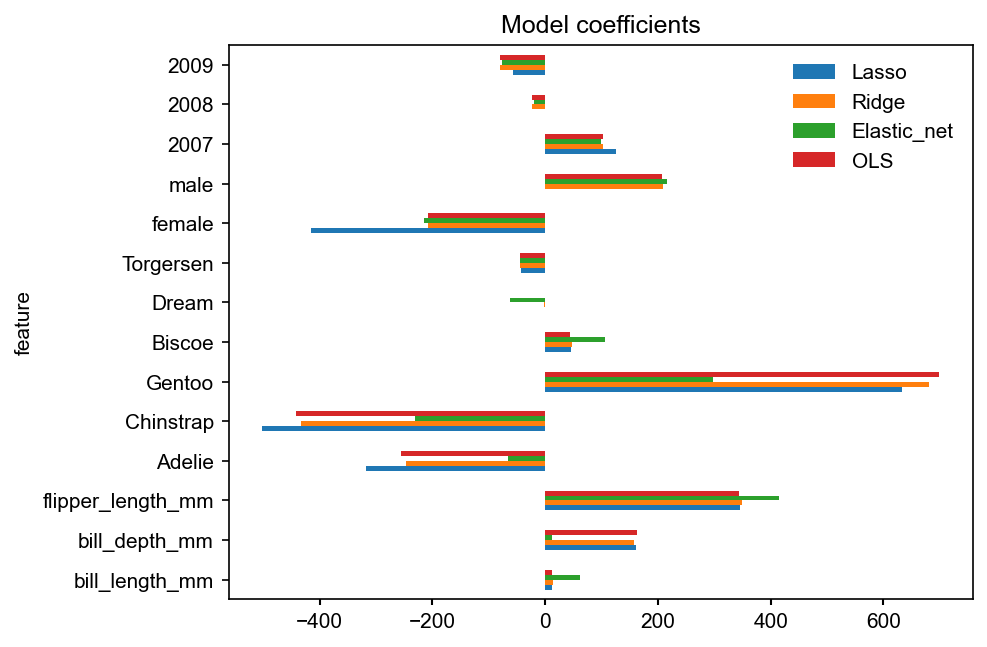

In [422]:
# plot the model coefficients for all models
coefs.plot(x="feature", kind="barh", stacked=False, title="Model coefficients")

<Axes: title={'center': 'Model coefficients'}, ylabel='feature'>

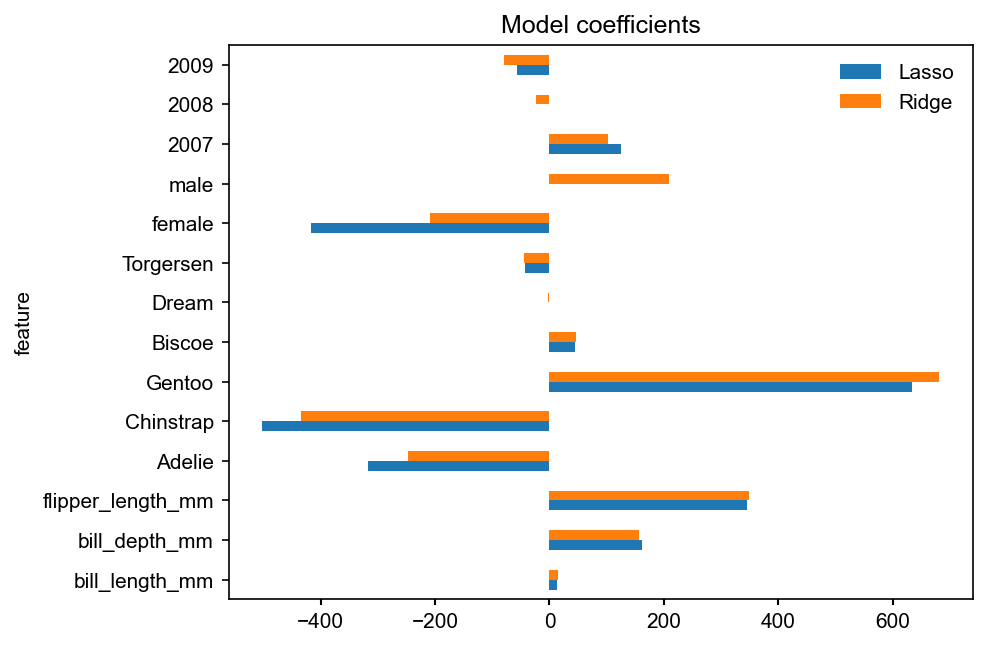

In [423]:
# plot the model coefficients for L1 and L2 models only
coefs[["feature", "Lasso", "Ridge"]].plot(x="feature", kind="barh", stacked=False, title="Model coefficients")

<span style="color:#DC537D"><font size="+1">Do any values seem missing in the plot above?</font></span>

## <span style="color:rebeccapurple">10. Predict values for the test set  <br> 11. Evaluate performance</span></h1>

In [424]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

for model, name in zip([model0, model1,  model2, model3], ["OLS", "Lasso", "Ridge", "Elastic Net"]):
    print("\n")
    print(name)
    
    # predict
    y_predicted_test = model.predict(processed_X_test)
    
    # evaluate performance
    print("test R2 : ", round(r2_score(y_test, y_predicted_test), 3))
    print("test MSE : ", int(mean_squared_error(y_test, y_predicted_test)))



OLS
test R2 :  0.851
test MSE :  90199


Lasso
test R2 :  0.851
test MSE :  90094


Ridge
test R2 :  0.851
test MSE :  90009


Elastic Net
test R2 :  0.857
test MSE :  86335


<span style="color:#DC537D"><font size="+2">How does alpha (lambda) affect the results?</font></span>
<br> Change the value of alpha across 0.1, 10, 100 for lasso and ridge regression models and plot the results. <br> Also calculate the model performance across these different values of alpha.

In [444]:
coefficient_dataframe_list = []

for alpha in [0.1, 10, 100]:
    # define model hyperparams
    model1 = linear_model.Lasso(alpha=alpha)
    model2 = linear_model.Ridge(alpha=alpha)
    
    # fit the model on train data
    model1.fit(processed_X_train, y_train)
    model2.fit(processed_X_train, y_train)
    
    #get coefficients table
    coefs = pd.DataFrame({"Lasso" : model1.coef_, "Ridge" : model2.coef_, })
    coefs["feature"] = feature_names
    coefs["alpha"] = alpha
    
    # append to list
    coefficient_dataframe_list.append(coefs)
    
# concat the list of dataframes
final_coefs = pd.concat(coefficient_dataframe_list)

In [445]:
final_coefs

,Lasso,Ridge,feature,alpha
0,1.249122e+01,14.349430,bill_length_mm,0.1
1,1.614444e+02,156.760389,bill_depth_mm,0.1
2,3.447997e+02,349.150954,flipper_length_mm,0.1
3,-3.178390e+02,-246.771131,Adelie,0.1
4,-5.016271e+02,-433.381936,Chinstrap,0.1
5,6.327034e+02,680.153067,Gentoo,0.1
6,4.541732e+01,47.243169,Biscoe,0.1
7,0.000000e+00,-2.442876,Dream,0.1
8,-4.233785e+01,-44.800294,Torgersen,0.1
9,-4.162408e+02,-208.509339,female,0.1


<Axes: title={'center': 'Model coefficients'}, ylabel='feature'>

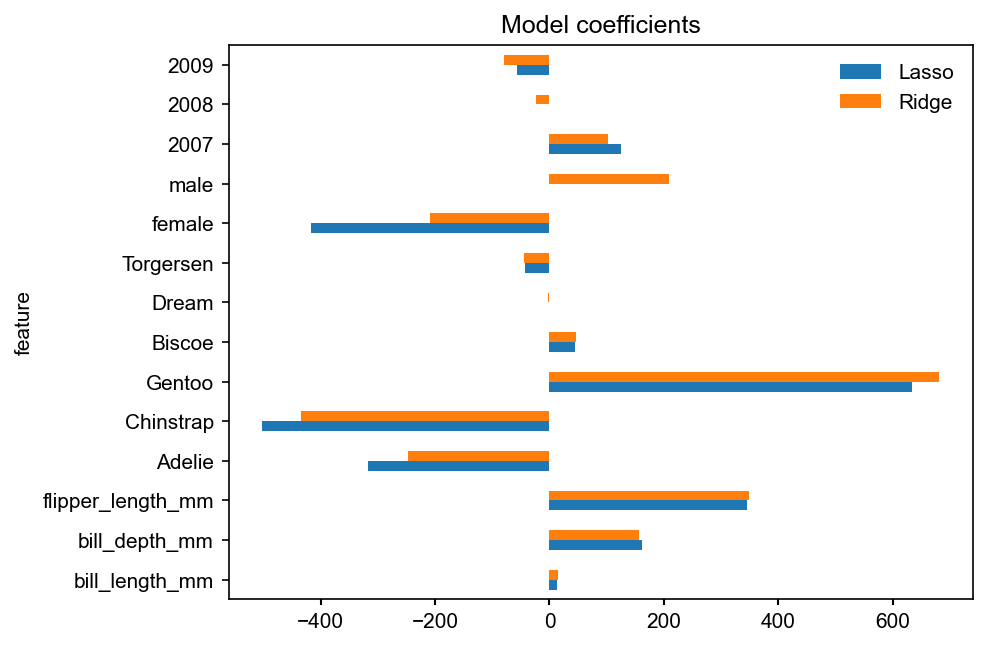

In [455]:
# plot the results
plot_df = final_coefs.loc[final_coefs.alpha==0.1, ["Lasso", "Ridge", "feature"]]
plot_df.plot(x="feature", kind="barh", stacked=False, title="Model coefficients")

<Axes: title={'center': 'Model coefficients'}, ylabel='feature'>

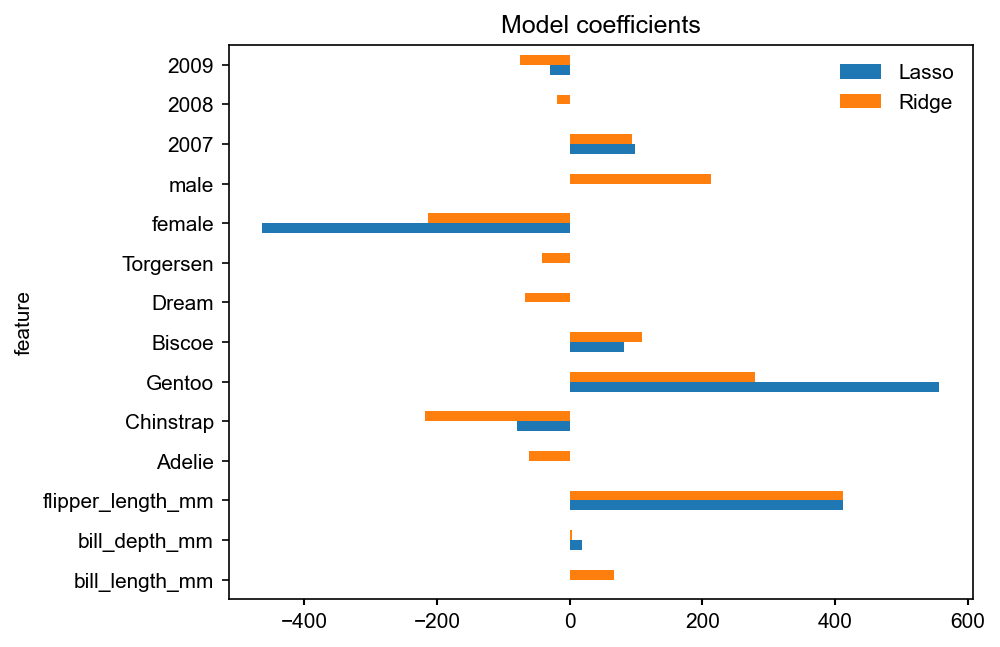

In [456]:
# plot the results
plot_df = final_coefs.loc[final_coefs.alpha==10, ["Lasso", "Ridge", "feature"]]
plot_df.plot(x="feature", kind="barh", stacked=False, title="Model coefficients")

<Axes: title={'center': 'Model coefficients'}, ylabel='feature'>

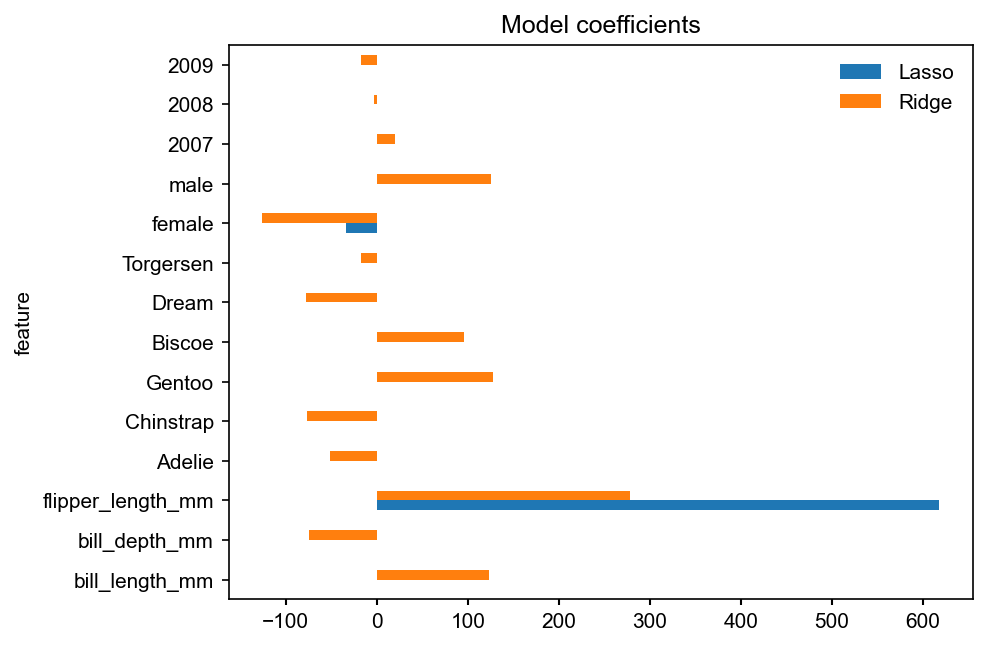

In [457]:
# plot the results
plot_df = final_coefs.loc[final_coefs.alpha==100, ["Lasso", "Ridge", "feature"]]
plot_df.plot(x="feature", kind="barh", stacked=False, title="Model coefficients")

## <span style="color:rebeccapurple">9. Model cross-validation</span></h1>

Alpha above is a hyper-parameter.
<br>It must also be optimized for best model performance.

When evaluating different settings (“hyperparameters”) for estimators, that must be manually set, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using k-1 of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

In [429]:
from IPython.display import Image
Image(url="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png", width=600, height=600)

In [430]:
from sklearn.model_selection import cross_val_score

In [434]:
# fit the models to the training data
scores = cross_val_score(model1, processed_X_train, y_train, cv=5)
scores

array([0.91213544, 0.77799597, 0.91743448, 0.8738194 , 0.85356473])

<span style="color:#DC537D"><font size="+2">What does 5-fold cross-validation on all the 4 models yeild?</font></span>

In [470]:
alpha=10
model0 = linear_model.LinearRegression()
model1 = linear_model.Lasso(alpha=alpha) # alpha controls regularization strength
model2 = linear_model.Ridge(alpha=alpha)
model3 = linear_model.ElasticNet(alpha=alpha, l1_ratio=0.5)

In [471]:
print("alpha : " , alpha)
for model, name in zip([model0, model1,  model2, model3], ["OLS", "Lasso", "Ridge", "Elastic Net"]):
    print("\n")
    print(name)
    scores = cross_val_score(model, processed_X_train, y_train, cv=5)
    print(scores)
    print("%0.3f R2 with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

alpha :  10


OLS
[0.91219679 0.7779247  0.91746607 0.87357612 0.85331188]
0.867 R2 with a standard deviation of 0.051


Lasso
[0.90071787 0.77380577 0.90984951 0.88213889 0.83678115]
0.861 R2 with a standard deviation of 0.050


Ridge
[0.906095   0.75698309 0.89607879 0.88021329 0.84835111]
0.858 R2 with a standard deviation of 0.054


Elastic Net
[0.4774616  0.33890714 0.37351074 0.44137736 0.38386575]
0.403 R2 with a standard deviation of 0.050
